In [64]:
import pandas as pd
from google.colab import drive

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import numpy as np

!pip install --upgrade category_encoders
import category_encoders  as ce
from matplotlib import pyplot as plt

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [66]:
data_frame

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


Para aquellas filas con mucho porcentaje de nans ***(a mi criterio, las que tienen+60%)*** , voy a fillearlas con 'unknown', mientras que aquellas que tengan porcentaje bajo, voy a usar el **'most-frequent strategy'** de simpleImputer

In [67]:
(( len(data_frame) - data_frame.count() )*100 / len(data_frame)).nlargest(len(data_frame.columns))

veil-type               94.797688
spore-print-color       89.595376
veil-color              87.861272
stem-root               84.393064
stem-surface            62.427746
gill-spacing            41.040462
cap-surface             23.121387
gill-attachment         16.184971
ring-type                4.046243
class                    0.000000
stem-color               0.000000
habitat                  0.000000
has-ring                 0.000000
stem-width               0.000000
cap-diameter             0.000000
stem-height              0.000000
gill-color               0.000000
does-bruise-or-bleed     0.000000
cap-color                0.000000
cap-shape                0.000000
season                   0.000000
dtype: float64

# Separando la variable a predecir

In [68]:
X = data_frame.drop('class', axis=1)
y = data_frame['class']

In [69]:
y = y.map({"e":1,"p":0})

# Division de sets

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

In [71]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
53852,15.74,f,k,n,f,d,c,y,5.02,28.73,NaN,k,n,NaN,NaN,f,f,NaN,d,a
60915,1.27,f,s,y,f,f,f,f,3.79,5.63,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
15408,12.05,f,y,e,f,NaN,NaN,w,6.03,23.98,b,NaN,n,NaN,w,t,e,NaN,d,a
52495,8.08,x,t,y,f,p,NaN,y,6.04,14.95,NaN,NaN,y,NaN,y,t,NaN,NaN,d,a
2792,6.44,x,h,n,f,e,NaN,w,12.23,12.77,NaN,s,w,u,w,f,f,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60134,8.53,o,NaN,n,f,f,f,f,3.63,25.28,NaN,g,n,NaN,NaN,f,f,NaN,d,s
56848,10.66,f,e,b,f,NaN,c,b,5.10,19.52,NaN,NaN,w,NaN,NaN,t,f,NaN,d,a
32842,1.62,x,i,k,f,a,NaN,w,3.73,2.63,NaN,NaN,w,NaN,NaN,f,f,p,g,a
47280,1.29,x,NaN,n,f,NaN,NaN,n,5.00,2.45,NaN,s,n,NaN,NaN,f,f,k,g,a


# Relleno de nans

`Imputacion 1) Reemplazar por una constante`

In [72]:
X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')

In [73]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
53852,15.74,f,k,n,f,d,c,y,5.02,28.73,unknown,k,n,unknown,unknown,f,f,unknown,d,a
60915,1.27,f,s,y,f,f,f,f,3.79,5.63,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
15408,12.05,f,y,e,f,NaN,NaN,w,6.03,23.98,b,unknown,n,unknown,w,t,e,unknown,d,a
52495,8.08,x,t,y,f,p,NaN,y,6.04,14.95,unknown,unknown,y,unknown,y,t,NaN,unknown,d,a
2792,6.44,x,h,n,f,e,NaN,w,12.23,12.77,unknown,s,w,u,w,f,f,unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60134,8.53,o,NaN,n,f,f,f,f,3.63,25.28,unknown,g,n,unknown,unknown,f,f,unknown,d,s
56848,10.66,f,e,b,f,NaN,c,b,5.10,19.52,unknown,unknown,w,unknown,unknown,t,f,unknown,d,a
32842,1.62,x,i,k,f,a,NaN,w,3.73,2.63,unknown,unknown,w,unknown,unknown,f,f,p,g,a
47280,1.29,x,NaN,n,f,NaN,NaN,n,5.00,2.45,unknown,s,n,unknown,unknown,f,f,k,g,a


`Imputacion 2) Reemplazar por el mas frecuente`

In [74]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')
mode = simple.fit_transform(X_train)

In [75]:
X_train = pd.DataFrame(simple.transform(X_train), columns = X_train.columns)
X_validation = pd.DataFrame(simple.transform(X_validation), columns = X_validation.columns)
X_test = pd.DataFrame(simple.transform(X_test), columns = X_test.columns)

In [76]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.74,f,k,n,f,d,c,y,5.02,28.73,unknown,k,n,unknown,unknown,f,f,unknown,d,a
1,1.27,f,s,y,f,f,f,f,3.79,5.63,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
2,12.05,f,y,e,f,a,c,w,6.03,23.98,b,unknown,n,unknown,w,t,e,unknown,d,a
3,8.08,x,t,y,f,p,c,y,6.04,14.95,unknown,unknown,y,unknown,y,t,f,unknown,d,a
4,6.44,x,h,n,f,e,c,w,12.23,12.77,unknown,s,w,u,w,f,f,unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,8.53,o,t,n,f,f,f,f,3.63,25.28,unknown,g,n,unknown,unknown,f,f,unknown,d,s
48851,10.66,f,e,b,f,a,c,b,5.1,19.52,unknown,unknown,w,unknown,unknown,t,f,unknown,d,a
48852,1.62,x,i,k,f,a,c,w,3.73,2.63,unknown,unknown,w,unknown,unknown,f,f,p,g,a
48853,1.29,x,t,n,f,a,c,n,5.0,2.45,unknown,s,n,unknown,unknown,f,f,k,g,a


In [77]:
X_validation

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,7.81,s,t,y,f,x,c,y,6.27,18.18,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
1,10.96,o,t,e,f,f,f,f,3.89,26.2,unknown,g,n,unknown,unknown,f,f,unknown,d,s
2,9.27,x,i,n,f,a,c,n,11.77,18.76,s,unknown,n,unknown,e,f,f,unknown,d,a
3,7.93,x,y,w,t,a,c,n,7.56,13.68,s,unknown,w,unknown,unknown,t,l,unknown,g,a
4,9.96,x,t,y,f,p,c,y,8.33,15.72,unknown,unknown,y,unknown,y,t,f,unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,13.53,f,t,r,t,d,c,n,6.19,16.4,unknown,unknown,n,unknown,unknown,f,f,unknown,d,a
6103,3.55,x,t,n,f,a,c,n,4.84,6.47,unknown,y,n,unknown,unknown,t,z,unknown,d,w
6104,4.16,x,s,o,f,p,c,n,5.16,10.51,unknown,unknown,n,unknown,unknown,f,f,unknown,d,u
6105,4.51,x,h,l,f,s,c,u,6.44,9.02,unknown,y,n,unknown,unknown,t,e,k,g,a


In [78]:
X_test

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,2.38,p,t,n,f,a,c,n,8.13,2.59,unknown,t,y,unknown,unknown,t,e,unknown,m,a
1,2.35,b,t,n,f,a,c,g,5.48,2.31,unknown,s,g,unknown,unknown,f,f,unknown,d,u
2,7.7,b,y,w,f,a,c,k,14.78,18.18,unknown,unknown,w,unknown,unknown,f,f,unknown,d,a
3,5.64,c,k,w,t,x,c,y,6.76,12.15,unknown,unknown,w,unknown,unknown,f,f,unknown,g,a
4,5.69,x,t,y,t,x,c,y,7.84,14.56,unknown,unknown,w,unknown,unknown,f,f,unknown,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,10.65,x,t,g,t,x,c,n,10.0,22.49,s,unknown,n,unknown,u,f,f,unknown,d,a
6103,5.2,c,t,n,f,e,c,w,12.43,13.25,unknown,s,n,u,w,f,f,unknown,d,u
6104,8.51,f,y,n,f,e,c,p,4.52,13.0,unknown,unknown,w,unknown,unknown,t,l,unknown,w,a
6105,9.27,x,t,n,f,a,d,w,11.46,32.54,unknown,unknown,w,unknown,unknown,f,f,unknown,d,a


# Encodings 

OHE Encoding

In [46]:
ohe_ring = OneHotEncoder(drop='first')

encoded_ring_train = ohe_ring.fit_transform(X_train[['has-ring']]).todense().astype(int)
encoded_ring_validation = ohe_ring.transform(X_validation[['has-ring']]).todense().astype(int)
encoded_ring_test = ohe_ring.transform(X_test[['has-ring']]).todense().astype(int)

encoded_bruise_train = ohe_ring.fit_transform(X_train[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_validation = ohe_ring.transform(X_validation[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_test = ohe_ring.transform(X_test[['does-bruise-or-bleed']]).todense().astype(int)

In [47]:
X_train['has-ring'] = encoded_ring_train
X_validation['has-ring'] = encoded_ring_validation
X_test['has-ring'] = encoded_ring_test

X_train['does-bruise-or-bleed'] = encoded_bruise_train
X_validation['does-bruise-or-bleed'] = encoded_bruise_validation
X_test['does-bruise-or-bleed'] = encoded_bruise_test

Binary Encoding

In [48]:
bin_encoded = ce.BinaryEncoder(cols=["cap-shape","cap-surface","cap-color","gill-attachment","gill-spacing","gill-color","stem-root","stem-surface",
                                     "stem-color","veil-type","veil-color","ring-type","spore-print-color","habitat" ,"season"], return_df = True)

bin_encoded.fit(X_train)
X_train = bin_encoded.transform(X_train)
X_validation = bin_encoded.transform(X_validation)
X_test = bin_encoded.transform(X_test)

# **Random forest default (respuesta, es el que da auc = 1)**

In [49]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import numpy as np
%matplotlib inline
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn import tree

In [50]:
rf_model = RandomForestClassifier(random_state=13)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_validation)

**conf_matrix**

In [51]:
cm = confusion_matrix(y_validation, preds)
cm

array([[3374,    0],
       [   0, 2733]])

**auc_result**

In [52]:
auc_result = (roc_auc_score(y_validation, preds))
print("AUC_ROC: %f" % (auc_result))

AUC_ROC: 1.000000


# Feature importance plot

In [53]:
rf_model.feature_importances_

array([6.79661440e-02, 1.79491623e-02, 1.14328984e-02, 2.31585383e-02,
       1.49093924e-02, 2.11739293e-02, 2.36738040e-02, 1.85520253e-02,
       1.29037843e-02, 1.29650318e-02, 1.44360996e-02, 1.53777249e-02,
       2.36895078e-02, 3.11865161e-02, 3.05490470e-02, 2.12830796e-02,
       3.75299222e-02, 6.01931400e-03, 1.37892787e-02, 1.80370166e-02,
       2.41442474e-02, 1.65556285e-02, 6.28287468e-02, 1.08209766e-01,
       2.52975079e-02, 1.54034981e-02, 1.49909673e-02, 3.96812228e-03,
       2.77140493e-02, 1.96042079e-02, 2.15387090e-02, 9.00553520e-03,
       1.42150614e-02, 2.88956117e-02, 2.93046008e-02, 5.99714663e-03,
       4.86768677e-03, 1.29402287e-02, 8.76854636e-03, 7.25186519e-03,
       1.93586961e-02, 4.77274467e-03, 8.00586256e-03, 8.91782886e-03,
       6.86944255e-03, 1.06572557e-03, 8.57744436e-03, 9.14625115e-03,
       2.43560627e-03, 4.60107827e-05, 8.46798931e-03, 1.10849056e-02,
       4.51168642e-03, 2.49747058e-03, 2.10911086e-03, 4.04927422e-03])

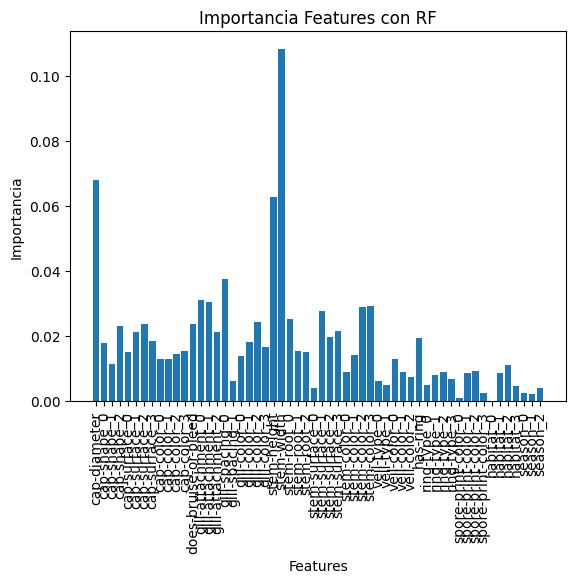

In [54]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation=90)
plt.show()

In [55]:
rf_features_list = rf_model.feature_names_in_
rf_features_imporance_list = rf_model.feature_importances_

sumo las importancias por feature, que antes las tenia separadas por el encoding binario

In [56]:
rf_dicc = {}
for i in range ( 0 , len(rf_features_list) ):
  features_binary_clean = rf_features_list[i].split('_')[0]
  if features_binary_clean not in rf_dicc:
    rf_dicc[features_binary_clean] = rf_features_imporance_list[i]
  else:
    rf_dicc[features_binary_clean] += rf_features_imporance_list[i]

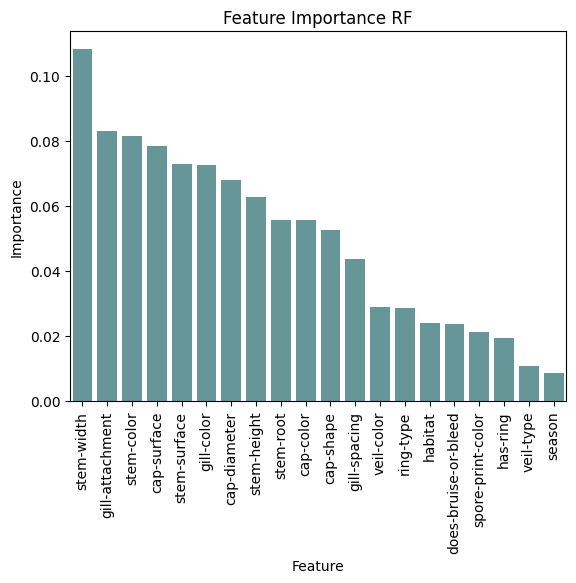

In [57]:
feature_importance_df = pd.DataFrame(rf_dicc.items())
feature_importance_df.columns = ['Feature' , 'Importance']
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
import seaborn as sns
ax = sns.barplot(x='Feature', y='Importance', data=feature_importance_df, color = 'CadetBlue')
ax.set(xlabel = 'Feature', ylabel='Importance', title='Feature Importance RF',)
plt.xticks(rotation=90)
plt.show()

# Random Forest con randomSearchCV

In [58]:
rf_model = RandomForestClassifier(random_state=13)

from sklearn.model_selection import RandomizedSearchCV
params = [
{
    "n_estimators": np.arange(10, 110, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}
]

rs_rf = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=5, random_state=13, scoring='roc_auc')
rs_rf.fit(X_train, y_train)

preds_rs_rf = rs_rf.predict(X_validation)

In [59]:
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [60]:
model_rs_rf= rs_rf.best_estimator_

In [61]:
model_rs_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, max_samples=10000,
                       min_samples_split=16, n_estimators=50, random_state=13)

In [62]:
cm = confusion_matrix(y_validation, preds_rs_rf)
cm

array([[3374,    0],
       [   1, 2732]])

In [63]:
auc_result = (roc_auc_score(y_validation, preds_rs_rf))
print("AUC_ROC: %f" % (auc_result))

AUC_ROC: 0.999817
